# fig — convergence (final)

**Motivation**: host = ```mach```, device = ```cuda:2``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from analysis.chosen import *
from figures.analysis import *

device_idx = 2
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:2  ———  host: mach

In [3]:
fig_dir = pjoin(fig_base_dir, 'iclr_oct02')
os.makedirs(fig_dir, exist_ok=True)
print(os.listdir(fig_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

[
    'ftrs_iP-VAE.png',
    'mnist_to_cifar',
    'ftrs_P-VAE.png',
    'ood',
    'convergence_mse_mnist2omni.pdf',
    'rot',
    'convergence_mse_mnist2mnist.pdf',
    'recon'
]

## Load df

In [4]:
df_omni = pd.read_pickle(pjoin(tmp_dir, 'df_converge_mnist2omni.df'))
df_mnist = pd.read_pickle(pjoin(tmp_dir, 'df_converge_mnist2mnist.df'))

## Add Marino & Kim

### mnist

In [5]:
dekel_dir = '/home/hadi/Dropbox/git/jb-vae/tmp/dekel_data/'
mse_outside = pjoin(dekel_dir, 'mnist_mse_1000iter.npz')
mse_outside = dict(np.load(mse_outside, allow_pickle=True))
mse_mnist = {
    'sa-VAE': mse_outside['semi'],
    'ia-VAE (h)': mse_outside['marino_h'],
    'ia-VAE (s)': mse_outside['marino_sl'],
}

### omni

In [6]:
dekel_dir = '/home/hadi/Dropbox/git/jb-vae/tmp/dekel_data/'
mse_outside = pjoin(dekel_dir, 'from-mnist-to-omniglot_iters1000.npz')
mse_outside = dict(np.load(mse_outside, allow_pickle=True))

marino_separate = 'MARINO_single_level_from-mnist-to-omniglot_MNIST_SL_iters1000_full_mse.npz.npy'
marino_separate = np.load(pjoin(dekel_dir, marino_separate))

mse_omni = {
    'sa-VAE': mse_outside['SAVAE_from-mnist-to-omniglot-_iter1000_full.npz'],
    'ia-VAE (h)': mse_outside['MARINO_hierarchical_from-mnist-to-omniglot_MNIST_H_iters1000_full.npz'],
    'ia-VAE (s)': marino_separate,
    # 'ia-VAE (s)': mse_outside['MARINO_single_level_from-mnist-to-omniglot_MNIST_SL_iters1000_full_mse.npz.npz'],
}

## Prep palettes

In [7]:
pal_models = get_palette_models()
cube_1, cube_2 = get_palette_cube()

display(cube_1)
display(cube_2)

[[0.5824870441488921, 0.7363453335709885, 0.8433717011545296],
 [0.3539515775044114, 0.546748869622813, 0.6653947680423337],
 [0.16988211962067074, 0.3386232545510099, 0.4298800647405776]]

[[0.8645027806639409, 0.6130500616242651, 0.7355509855551107],
 [0.69406441420036, 0.39526932513071356, 0.5502981253898998],
 [0.456754933872734, 0.20850154256328235, 0.3454274980888438]]

In [8]:
selected_models = {
    'mlp': ['(4,1.5)', '(16,8.0)', '(64,24.0)'],
    'conv': ['(4,1.5)', '(16,8.0)'],  # '(32,16.0)'],
}
pal = {
    'mlp': dict(zip(selected_models['mlp'], cube_1)),
    'conv': dict(zip(selected_models['conv'], cube_2)),
}

In [9]:
rename_marino_models = {
    'ia-VAE (single-level)': 'ia-VAE (s)',
    'ia-VAE (hierarchical)': 'ia-VAE (h)',
}

pal_models = get_palette_models()

for name, new_name in rename_marino_models.items():
    pal_models[new_name] = pal_models.pop(name)

## selected iP-VAE models

In [10]:
selected_models = [
    '<jacob|mlp>_(4,1.5)',
    '<jacob|mlp>_(16,8.0)',
    '<jacob|mlp>_(64,24.0)',
    '<jacob|conv>_(4,1.5)',
    '<jacob|conv>_(16,8.0)',
]
selected_models = ['MNIST_' + s for s in selected_models]
print(selected_models)

[
    'MNIST_<jacob|mlp>_(4,1.5)',
    'MNIST_<jacob|mlp>_(16,8.0)',
    'MNIST_<jacob|mlp>_(64,24.0)',
    'MNIST_<jacob|conv>_(4,1.5)',
    'MNIST_<jacob|conv>_(16,8.0)'
]

In [11]:
selected_models = {
    'mlp': ['(4,1.5)', '(16,8.0)', '(64,24.0)'],
    'conv': ['(4,1.5)', '(16,8.0)'], #'(32,16.0)'],
}
pal = {
    'mlp': dict(zip(selected_models['mlp'], cube_1)),
    'conv': dict(zip(selected_models['conv'], cube_2)),
}

## Plot

### mnist

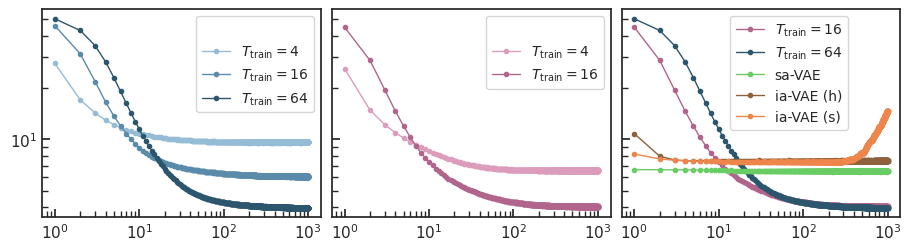

In [12]:
fig, axes = create_figure(1, 3, (9.0, 2.4), sharex='all', sharey='all')

for i, (archi, selected) in enumerate(selected_models.items()):
    for item in selected:
        name = f'MNIST_<jacob|{archi}>_{item}'
        _df = df_mnist.loc[df_mnist['name'] == name]
        if not len(_df):
            continue
        x2p = _df['mse'].to_numpy()
    
        ax = axes[i]
        label = r"$T_\text{train} = $"
        label += str(_df['n_iters_train'].unique().item())
        ax = convergence_subplot(ax, x2p, label, color=pal[archi][item], legend_title=' ', legend=True)
        ax.tick_params(direction='in', which='both')


# add to bag of last subolot
ax = axes[2]

for archi, item in {'conv': '(16,8.0)', 'mlp': '(64,24.0)', }.items():
    name = f'MNIST_<jacob|{archi}>_{item}'
    _df = df_mnist.loc[df_mnist['name'] == name]
    if not len(_df):
        continue
    x2p = _df['mse'].to_numpy()

    label = r"$T_\text{train} = $"
    label += str(_df['n_iters_train'].unique().item())
    ax = convergence_subplot(ax, x2p, label, color=pal[archi][item], legend_title='', legend=False)
    ax.tick_params(direction='in', which='both')


# add marino & kim
ax = axes[2]
for label, x2p in mse_mnist.items():
    ax = convergence_subplot(ax, x2p[1:], label, color=pal_models[label], legend=True)

move_legend(ax, (0.365, 0.388))
ax.tick_params(direction='in', which='both')

plt.show()

In [13]:
fig.savefig(pjoin(fig_dir, 'convergence_mse_mnist2mnist.pdf'), **kws_fig)

### omni

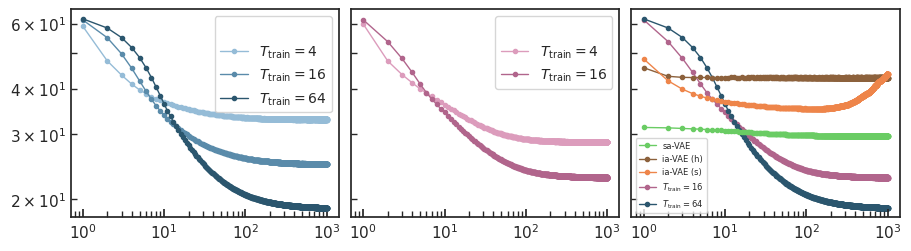

In [14]:
fig, axes = create_figure(1, 3, (9.0, 2.4), sharex='all', sharey='all')

for i, (archi, selected) in enumerate(selected_models.items()):
    for item in selected:
        name = f'MNIST_<jacob|{archi}>_{item}'
        _df = df_omni.loc[df_omni['name'] == name]
        if not len(_df):
            continue
        x2p = _df['mse'].to_numpy()
    
        ax = axes[i]
        label = r"$T_\text{train} = $"
        label += str(_df['n_iters_train'].unique().item())
        ax = convergence_subplot(ax, x2p, label, color=pal[archi][item], legend_title=' ', legend=True)
        ax.tick_params(direction='in', which='both')


# add marino & kim
ax = axes[2]
for label, x2p in mse_omni.items():
    ax = convergence_subplot(ax, x2p[1:], label, color=pal_models[label], legend=True)


# add to bag of last subolot
ax = axes[2]

for archi, item in {'conv': '(16,8.0)', 'mlp': '(64,24.0)', }.items():
    name = f'MNIST_<jacob|{archi}>_{item}'
    _df = df_omni.loc[df_omni['name'] == name]
    if not len(_df):
        continue
    x2p = _df['mse'].to_numpy()

    label = r"$T_\text{train} = $"
    label += str(_df['n_iters_train'].unique().item())
    ax = convergence_subplot(ax, x2p, label, color=pal[archi][item], legend_title='', legend=True, zorder=0)
    ax.tick_params(direction='in', which='both')



sns.move_legend(ax, 'best', fontsize=6)
# move_legend(ax, (0.365, 0.388))
ax.tick_params(direction='in', which='both')

plt.show()

In [15]:
fig.savefig(pjoin(fig_dir, 'convergence_mse_mnist2omni.pdf'), **kws_fig)